#### Myrzasheva_Azhar_DA301_Assignment
#### DA301 Advanced analytics for organisational impact
#### July 2023

## Predicting future outcomes



This Jupyter notebook is intended to utilise Python to explore the available data, create visualisations to identify trends and extract meaningful information to inform decision making for our client, **Turtle Games**. The client is a game manufacturer that produces and sells its own products as well as acts as a retailer selling products manufactured by other companies. The products range includes books, video games, board games, toys, etc.

**The business objective of Turtle games**: to improve overall sales performance. 

**Questions that need to be answered for the client**:
1. How customers accumulate loyalty points
2. How groups within the customer base can be used to target specific market segments 
3. How social data (e.g. customer reviews) can be used to inform marketing campaigns

Download the necessary data sets from [here](https://drive.google.com/drive/folders/1r6JD79QrGo4PGgulwt6Vg46J-cE4zFgG?usp=sharing). 

## 1. How customers accumulate loyalty points. 

**Objective:**
To investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

### 1.1. Load and explore the data:

In [958]:
# Import all the necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [959]:
# Import and read the data file: 
reviews = pd.read_csv('turtle_reviews.csv')

# View the data frame: 
print(reviews.head())
print(reviews.info())

# Print the descriptive statistics for the columns with numeric values: 
print(reviews.describe())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                                                                                                                                                                                                                                                                            

Note that the descriptive statistics indicate that there are 2000 rows and no null values. There are 11 columns, but we will not need all of them. We need to delete some that do not contribute to the analysis (language, platform).

### 1.2. Drop columns

In [960]:
# Remove redundant columns
reviews.drop(['language', 'platform'], axis=1, inplace=True)


In [961]:
# View column names
reviews.columns


Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

### 1.3. Change the column names

In [962]:
# Change the column names to names that are easier to reference
reviews_new = reviews.rename(columns = {'remuneration (k£)':'income',
                              'spending_score (1-100)':'score'})

In [963]:
# View the column names
reviews_new.columns

Index(['gender', 'age', 'income', 'score', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

### 1.4. Save the new data frame

In [964]:
# Save a copy of the clean data frame: 
reviews_new.to_csv('reviews_new.csv', index=False)

# View the data frame: 
print(reviews_new.head())
reviews_new.info()

   gender  age  income  score  loyalty_points education  product  \
0    Male   18   12.30     39             210  graduate      453   
1    Male   23   12.30     81             524  graduate      466   
2  Female   22   13.12      6              40  graduate      254   
3  Female   25   13.12     77             562  graduate      263   
4  Female   33   13.94     40             366  graduate      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### 1.5. Build regression models.

Here we will investigate the relationship between the loyalty points, age, remuneration, and spending scores. 
First, we will determine the independent and dependent variables. Since we are interested what can affect the loyalty points, this will be the dependent variable and set age, remuneration and spending scores as independent variables. Therefore, we will first build a multiple linear regression model and test the significance of these variables towards an independent variable. 

#### 1.5.1. Set the variables, fit the model and call the predictions for X

In [965]:
# Import the libraries:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')  

In [966]:
# Define the dependent variable.
y = reviews_new['loyalty_points']  

# Define the independent variables.
X = reviews_new[['age', 'income', 'score']] 

In [967]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

Now the 'mlr' variable contains the trained linear regression model, which can be used to make predictions on new data or to analyse the relationship between the dependent and independent variables. 

In [968]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

#### 1.5.2 Check the value of R-squared, the intercept, and the coefficients

In [969]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8399114912748796
Intercept:  -2203.059751307901
Coefficients:


[('age', 11.060658711843354),
 ('income', 34.008385492602514),
 ('score', 34.183196577633645)]

The R-squared or the coefficient of determination indicates the proportion of the total variation in y (dependent variable) that is explained or accounted for by X (independent variables). The more independent variables there are, the higher the R-squared value is. It shows almost 84% here, which means that the linear regression model explains about 84% of the variability in the loyalty_points based on the given independent variables.

However, if we look at the coefficients of independent variables, 'age' only accounts for 11.06 increase while 'income' and 'score' seem to be more important variables in predicting and explaining the loyalty points (34.01 and 34.18 respectively). For each one-unit increase in income, the estimated increase in loyalty_points is approximately 34.01.


#### 1.5.3. Make predictions

We will now try to predict the loyalty points of a person based on the following independent factors: aged 47, with an income of about 15.20 and his spending score is 95. 

In [970]:
# Create a variable 'new_age' and define it as 47.
new_age = 47

# Create a variable 'new_income' and define it as 15.20
new_income = 15.20

# Create a variable 'new_score' and define it as 95
new_score = 95

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[new_age, new_income, new_score]]))  


Predicted Value: 
 [2081.12234251]


So with our model, we can predict that a person aged 47, with his income of about 15.20 and a high spending score of 95 would probably have 2081 as their loyalty score with 84% of probability.

What if a person does not earn as much and their spending score is not that high. We shall test the loyalty score for that person too. 

In [971]:
# Create a variable 'new_age' and define it as 19.
new_age = 19

# Create a variable 'new_income' and define it as 12
new_income = 12

# Create a variable 'new_score' and define it as 47
new_score = 47

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[new_age, new_income, new_score]]))


Predicted Value: 
 [21.80362928]


As we can observe here, the loyalty points dramatically fell according to our MLR model. 

#### 1.5.4. Train and test subsets with (MLR) multiple linear regression



We now built the MLR model and, to validate it, we need to divide the review_new data set into training set and a test set. We need to do this in order to avoid overfitting and to evaluate model performance.

In [972]:
# Create train and test data sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [973]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:32:44   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2197.0105     58.134    -37.792      0.0

We now have only 1600 observations in this OLS model (80% from the reviews_new data set). The R-squared is now shown as 0.842. The t-statistics is used to test the statistical significace of all the three independent variables. The standard error of the 'age' variable is quite high which is affecting the statistical signicifance of it. But 'income' and 'score' are both showing the significance of more than 60.


#### 1.5.5 Run a regression test

In [974]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [975]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


#### 1.5.6. Test the model

In [976]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [-4.25709053e+02  2.99343559e+03  2.60003812e+03  1.22401268e+03
  1.53391529e+03  1.79212254e+03  4.18943142e+02  1.38614741e+03
  1.36427501e+03  3.26123743e+03  1.28766114e+03  1.65894130e+03
  1.69575771e+03  2.33734079e+03  1.27743942e+03  1.46204653e+03
  1.69474080e+03  8.09214691e+02 -2.63922829e+01 -9.61682267e+02
  1.55468086e+03  5.11057805e+01  1.64730047e+03  1.29858491e+03
  1.41546811e+03  1.42269406e+03  3.87919648e+03  1.61275266e+03
  1.63341589e+03  1.84791589e+03  8.88818487e+01  6.70246855e+02
  1.00427573e+03  1.71837726e+03  1.66852576e+03  1.28842071e+03
  8.91492831e+02  2.09899697e+03  1.36106930e+03  1.07872564e+03
  1.02910663e+03  1.57353521e+03  1.40597357e+03  4.23039314e+03
  4.27476021e+03 -3.51451403e+02  1.71837726e+03  1.53391529e+03
  1.84020998e+03  1.77547954e+03  1.36186127e+03  8.42143578e+02
  8.92577110e+02 -4.98080057e+02  1.95151882e+03  1.49956756e+03
  3.88942654e+02  4.07828006e+03  1.54909408e+03  3.16017028e+03


In [977]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

82.90723396315803


### Build simple linear regression models for every variable (age, income and spending score)
#### 1.5.7. Build a scatterplot with the independent variable 'age':

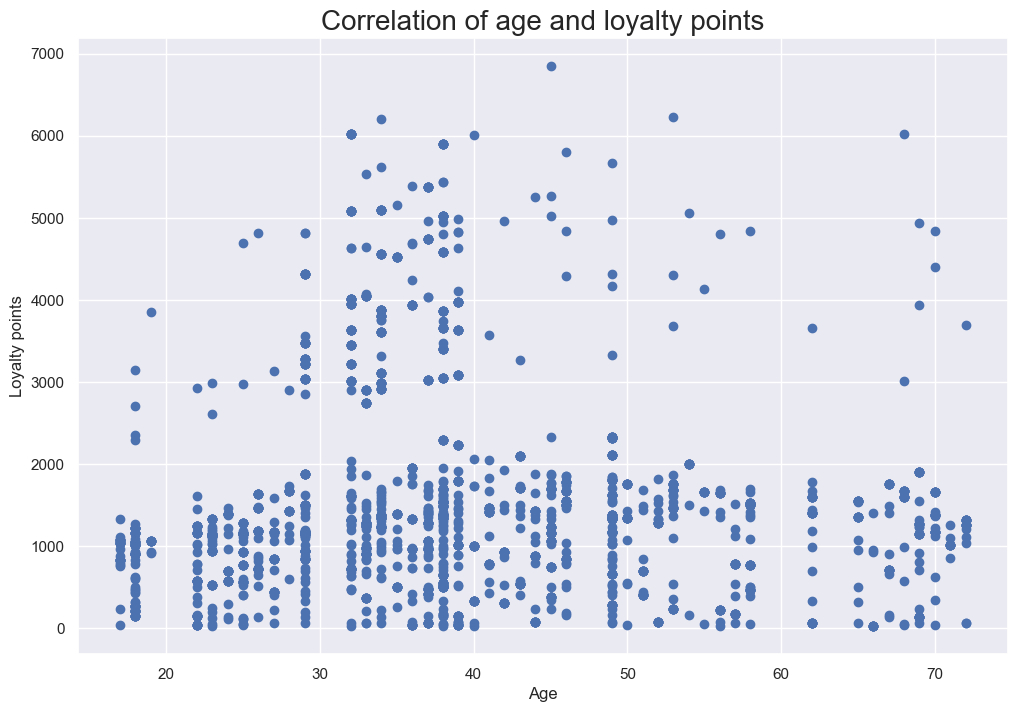

In [978]:
# Define the dependent variable.
y = reviews_new['loyalty_points'] 

# Define the independent variable.
x = reviews_new['age'] 

plt.title("Correlation of age and loyalty points", fontsize=20)
plt.xlabel("Age")
plt.ylabel("Loyalty points")

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [979]:
# Create formula and pass through OLS methods.
from statsmodels.formula.api import ols
f = 'y ~ x'
test = ols(f, data = reviews_new).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Jul 2023   Prob (F-statistic):             0.0577
Time:                        20:32:44   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [980]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [981]:
# Create the linear regression model.
# Set the the coefficient to -4.0128 and the constant to 1737.5177.
y_pred = 1736.5177 + (-4.0128) * reviews_new['age']

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

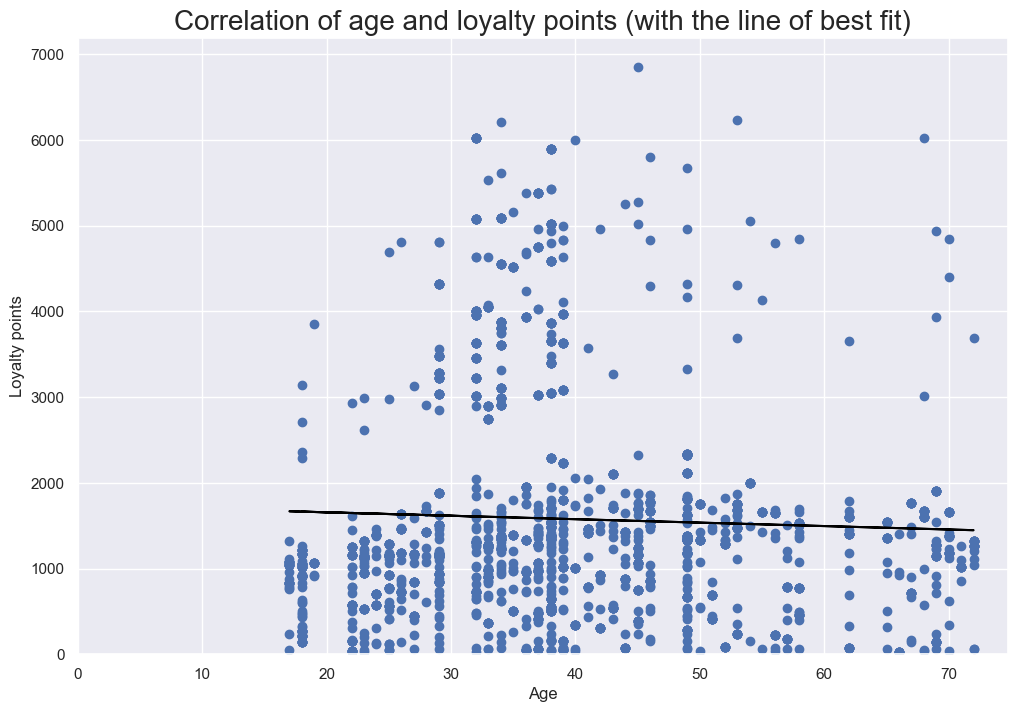

In [982]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

plt.title("Correlation of age and loyalty points (with the line of best fit)",
         fontsize=20)
plt.xlabel("Age")
plt.ylabel("Loyalty points")
plt.savefig("Age and points.jpeg", format="jpeg", dpi=300)

# View the plot.
plt.show()

Age alone does not give any positive correlation to the loyalty points. The R squared coefficient is only 0.002 and the t value is -1.899 which informs us about a very low statistical significance of the 'age' variable in relation to loyalty points. 

### 1.5.8. Build a scatterplot with the variable 'income'

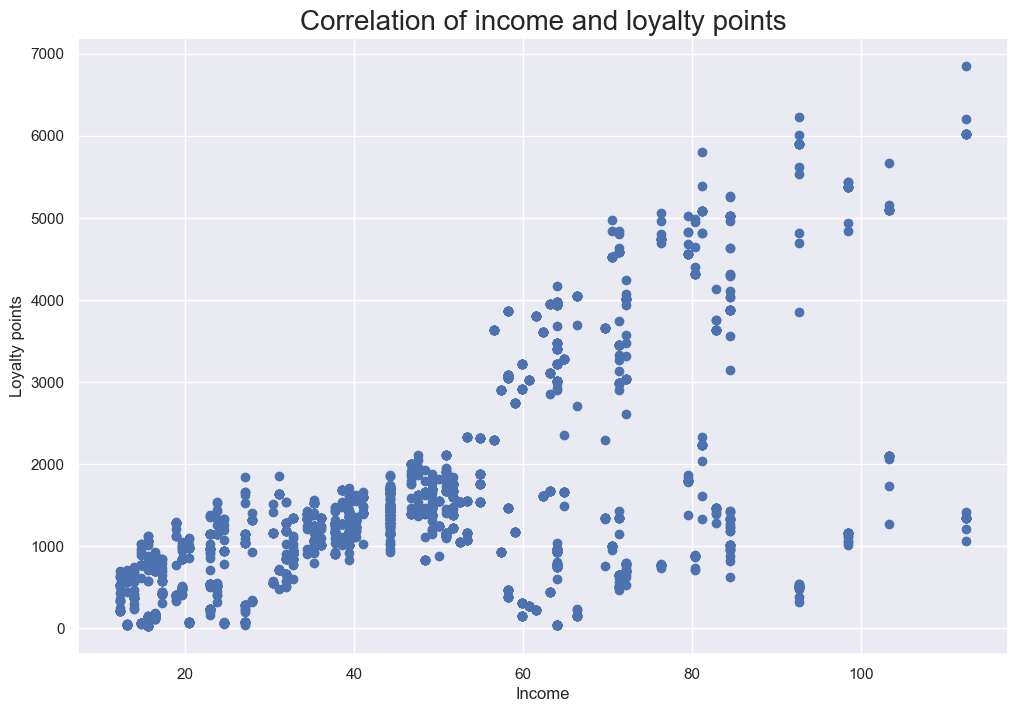

In [983]:
# Define the dependent variable.
y = reviews_new['loyalty_points'] 

# Define the independent variable.
x = reviews_new['income'] 

plt.title("Correlation of income and loyalty points", fontsize=20)
plt.xlabel("Income")
plt.ylabel("Loyalty points")

# Check for linearity with Matplotlib.
plt.scatter(x, y)


In [984]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_new).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        20:32:45   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [985]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [986]:
# Create the linear regression model.
# Set the the coefficient to 34.1878 and the constant to -65.6865.
y_pred = (-65.6865) +  34.1878 * reviews_new['income']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: income, Length: 2000, dtype: float64

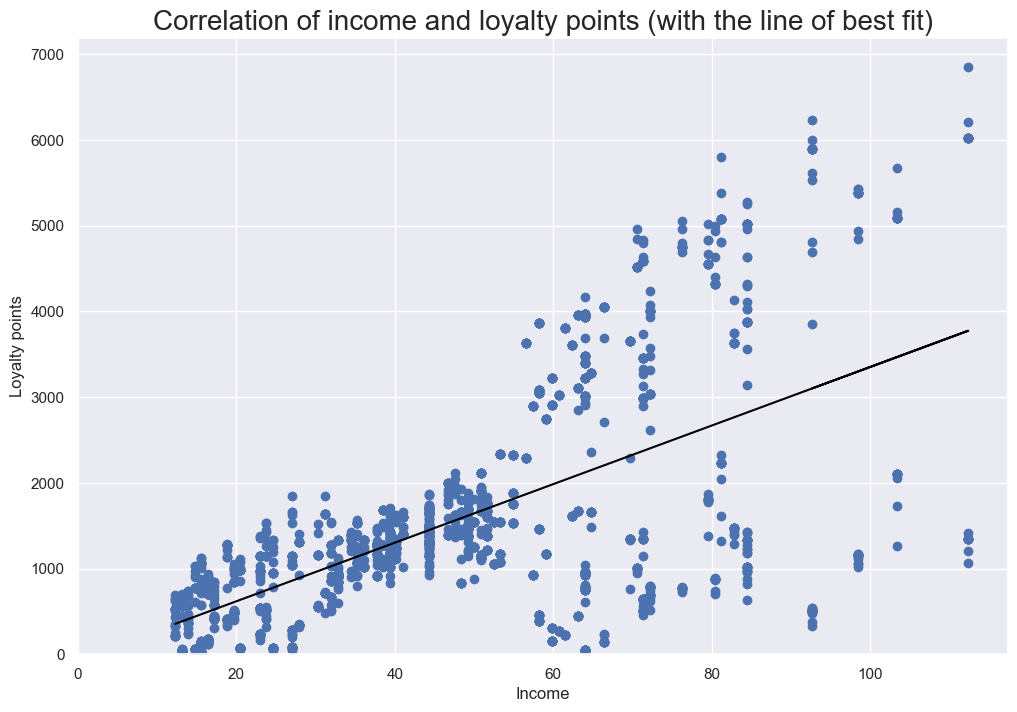

In [987]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

plt.title("Correlation of income and loyalty points (with the line of best fit)",
         fontsize=20)
plt.xlabel("Income")
plt.ylabel("Loyalty points")
plt.savefig("Income and points.jpeg", format="jpeg", dpi=300)

# View the plot.
plt.show()



The R squared coefficient of income in relation to the loyalty score is higher here accounting for 38% of the significance. The standard error coefficient is very close to 1 and is equal to 0.978. There is a very weak positive correlation between income and loyalty points.  

### 1.5.9. Build a scatterplot with the variable 'score'

Text(0.5, 1.0, 'Correlation of spending score and loyalty points')

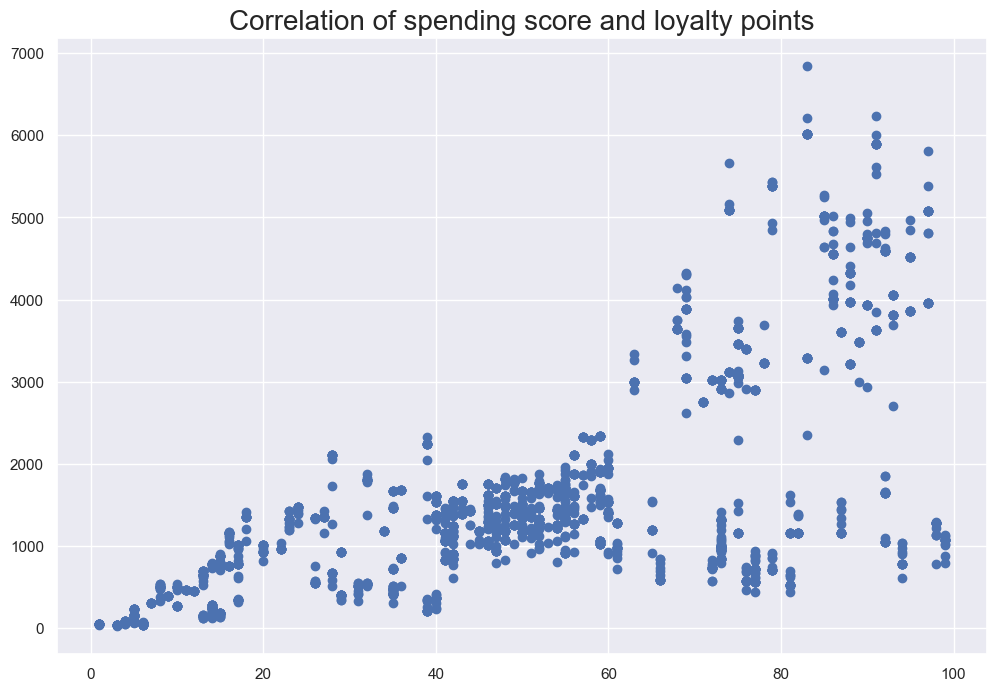

In [988]:
# Define the dependent variable.
y = reviews_new['loyalty_points'] 

# Define the independent variable.
x = reviews_new['score'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)
plt.title("Correlation of spending score and loyalty points", fontsize = 20)

In [989]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_new).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        20:32:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [990]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [991]:
# Create the linear regression model.
# Set the the coefficient to 33.0616 and the constant to -75.0526.
y_pred = (-75.0526) + 33.0616 * reviews_new['score']

# View the output.
y_pred

0       1214.3498
1       2602.9370
2        123.3170
3       2470.6906
4       1247.4114
          ...    
1995    2206.1978
1996     189.4402
1997    2933.5530
1998     453.9330
1999     189.4402
Name: score, Length: 2000, dtype: float64

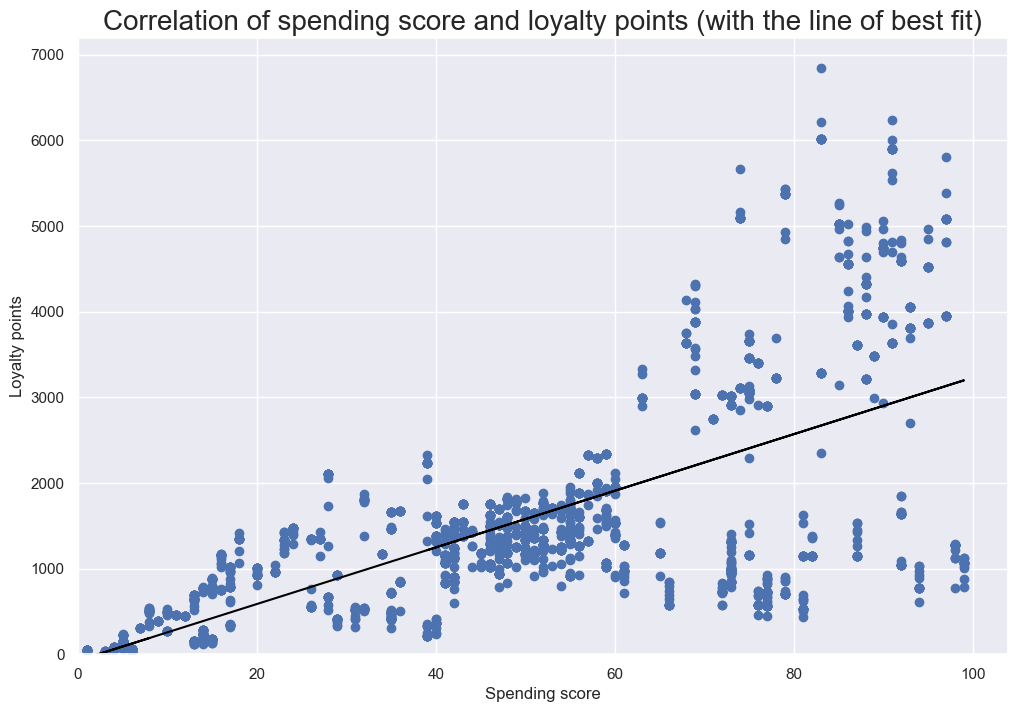

In [992]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

plt.xlabel("Spending score")
plt.ylabel("Loyalty points")
plt.title("Correlation of spending score and loyalty points (with the line of best fit)",
         fontsize = 20)
plt.savefig("Score and points.jpeg", format='jpeg', dpi=300)

# View the plot.
plt.show()


Spending score alone account for 45% of the correlation with the loyalty score. The statistical significance (t) is 40%, but the standard deviation is still quite high. This gives us also a very weak positive correlation between the spending score and loyalty points. 

### 1.6. Avoid multicollinearity


Multicollinearity is likely to occur in multiple linear regression models with 2 or more independent variables. High multicollinearity suggests that the independent variables are highly related to one another and this might cause faulty predictions. 

By looking at the OLS model above, we can see that the standard error is low which leads to a higher t-value and a low P value. Therefore, all three independent variables in our model are significant and do not have multicollinearity. 

## Summary
The initial data set consists of 2000 observations and 11 columns. The data set was explored, null values were checked, some columns had to be dropped and a new clean data set was created and saved. 

Due to the multiple independent variables that might affect the loyalty score, it was decided to build a multi linear regression model. According to the model, 'age' variable does not have a significant influence on the loyalty score, while remuneration and a spending score of a customer are quite significant factors in determining and predicting the loyalty scores of customers. If we were to plot the line of best fit in a linear regression model with every variable, we might say that there is a weak positive correlation between the independent and dependent variables. 

All three variables account for 84% of the R-squared value or a coefficient of determination.

The independent variables do not have multicollinearity and therefore we can consider this model to be valid and trustworthy. 

## 2. How groups within the customer base can be used to target specific market segments


**Objective:**
Use k-means clustering to identify the optimal number of clusters, and then apply and plot the data using the created segments.

A great way to identify and group unlabelled data is to use clustering algorithms. Clustering is considered to be a type of unsupervised machine learning. It is necessary to divide the population of data into clusters with more homogenous objects within the groups. 

Here we need to identify groups within the customer base that can be used to target specific market segments. I will use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.


### 2.1. Create plots with 'income' and 'loyalty_points' variables

Text(0.5, 1.02, 'Pairplot: Income vs. Loyalty points')

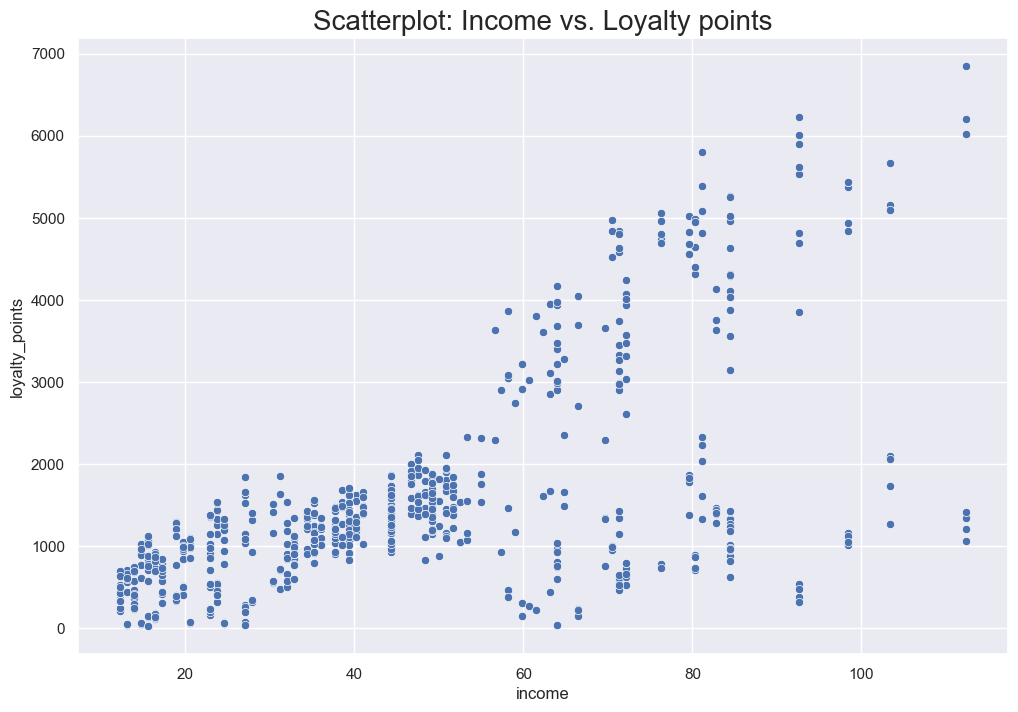

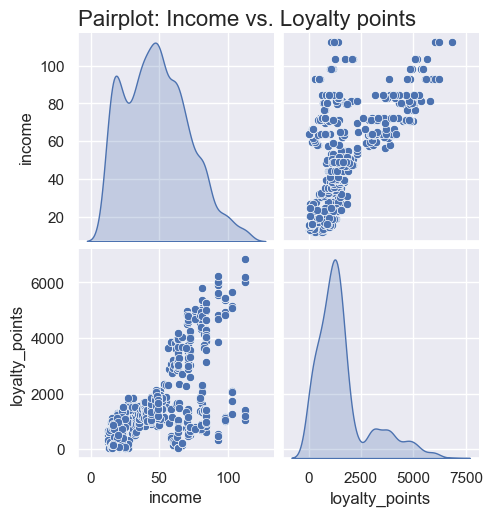

In [993]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='income',
                y='loyalty_points',
                data=reviews_new)
plt.title("Scatterplot: Income vs. Loyalty points", fontsize=20)

# Create a pairplot with Seaborn.
x = reviews_new[['income', 'loyalty_points']]

sns.pairplot(reviews_new,
             vars=x,
             diag_kind= 'kde')
plt.suptitle("Pairplot: Income vs. Loyalty points", y=1.02,
            fontsize = 16)

### 2.2. Decide on the number of clusters using elbow method

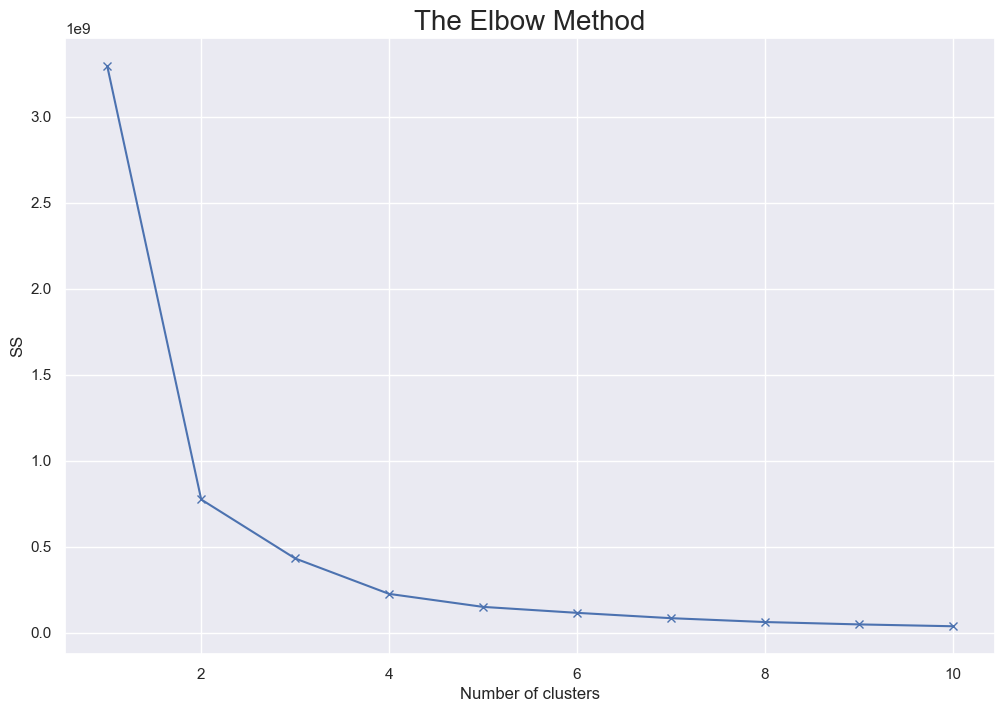

In [994]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='x')

plt.title("The Elbow Method", fontsize = 20)
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.savefig('elbow_method.png')
plt.show()


SS is a within-cluster-sum of squared errors. On the plot, an elbow-like feature will become visible where the WSS starts to diminish. 

### 2.3. Decide on the number of clusters using silhouette method

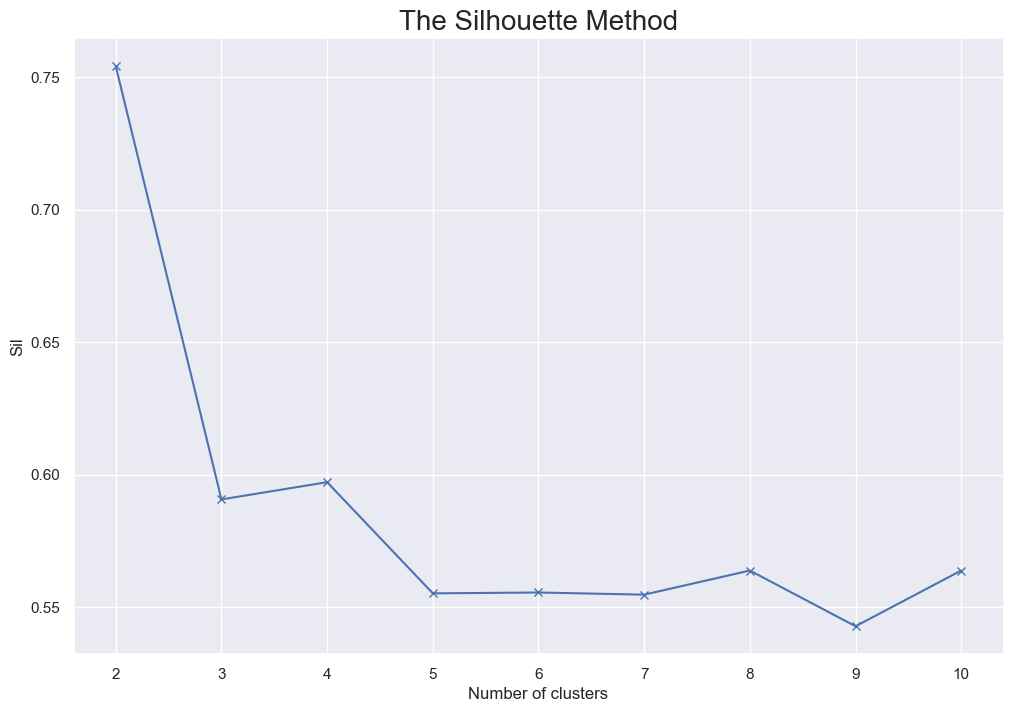

In [995]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = [] # list containing the silhouette scores
kmax = 10 # k represents the number of clusters in a clutering algorithm

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,  
         marker='x')

plt.title("The Silhouette Method", fontsize = 20)
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.savefig('silhouette_method.png')
plt.show()

The Silhouette method is a technique used to find the optimal number of clusters in a dataset when performing K-means clustering. It provides a measure of how well each data point in a cluster is separated from other clusters. The silhouette score ranges from -1 to 1, where a score close to +1 indicates that the data point is well-clustered and far away from other clusters. A score close to 0 indicates that the data point is near the decision boundary between two clusters and a score close to -1 indicates that the data point may have been assigned to the wrong cluster.

In this plot we can either use 3 or 4, with 4 giving a higher silhouette score. 

### 2.4. Evaluate k-means model with k=3

Text(0.5, 1.02, 'Paiplot: Income vs. Loyalty points, k=3')

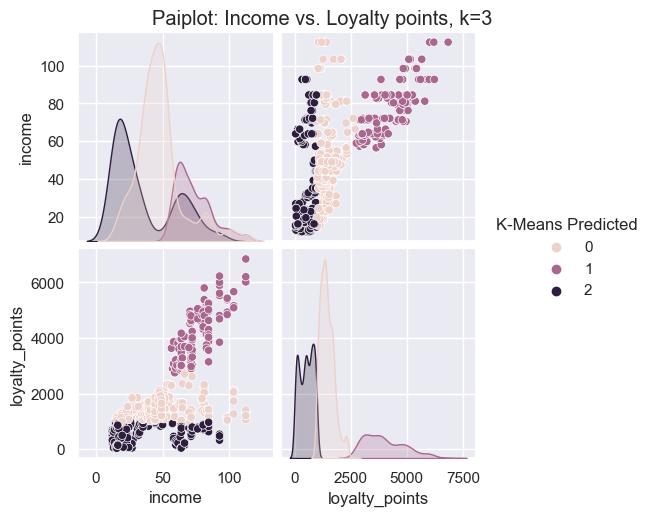

In [996]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.suptitle("Paiplot: Income vs. Loyalty points, k=3", y=1.02)

In [997]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    977
2    671
1    352
Name: K-Means Predicted, dtype: int64

In [998]:
# View the K-Means predicted.
print(x.head())
print(x.tail())

   income  loyalty_points  K-Means Predicted
0   12.30             210                  2
1   12.30             524                  2
2   13.12              40                  2
3   13.12             562                  2
4   13.94             366                  2
      income  loyalty_points  K-Means Predicted
1995   84.46            4031                  1
1996   92.66             539                  2
1997   92.66            5614                  1
1998   98.40            1048                  0
1999   92.66             479                  2


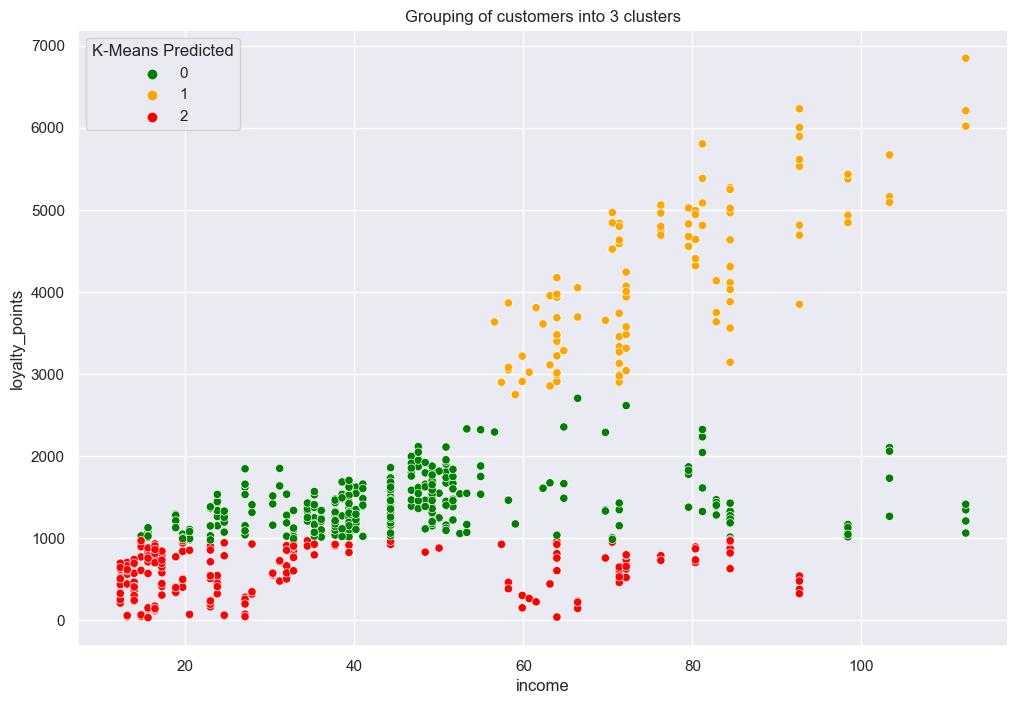

In [999]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='loyalty_points',
                data=x ,
                hue='K-Means Predicted', 
               palette = ['green', 'orange', 'red'])

plt.title("Grouping of customers into 3 clusters")

plt.savefig('3_clusters.png')

### 2.5. Evaluate k-means model with k = 4

Text(0.5, 1.02, 'Paiplot: Income vs. Loyalty points, k=4')

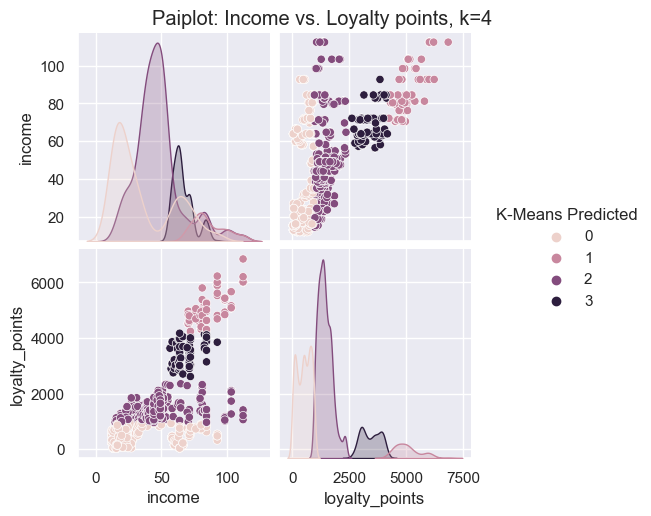

In [1000]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.suptitle("Paiplot: Income vs. Loyalty points, k=4", y=1.02)

In [1001]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    994
0    652
3    230
1    124
Name: K-Means Predicted, dtype: int64

Ideally, the values should be evenly distributed within each cluster. However, this is not always possible. The clustering works well as long as there is certain homogeneity within each cluster. 

In [1002]:
# View the K-Means predicted.
print(x.head())
print(x.tail())

   income  loyalty_points  K-Means Predicted
0   12.30             210                  0
1   12.30             524                  0
2   13.12              40                  0
3   13.12             562                  0
4   13.94             366                  0
      income  loyalty_points  K-Means Predicted
1995   84.46            4031                  3
1996   92.66             539                  0
1997   92.66            5614                  1
1998   98.40            1048                  2
1999   92.66             479                  0


The data was clustered into one category at the beginning of the data set and we can see all 4 clusters at the tail of the data set

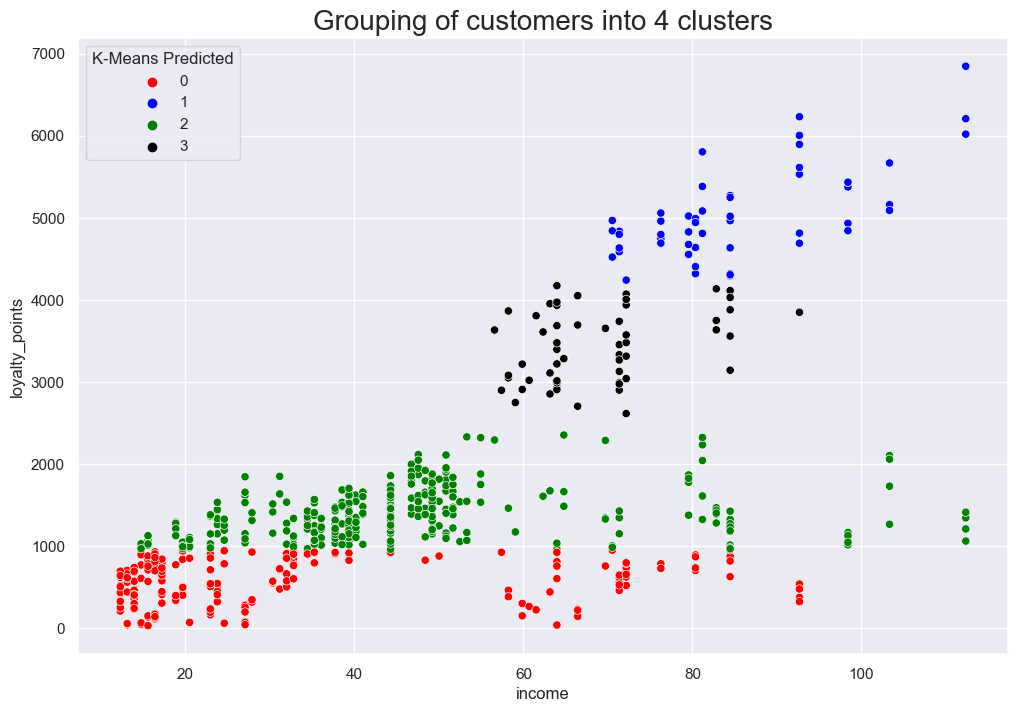

In [1003]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='loyalty_points',
                data=x ,
                hue='K-Means Predicted', 
               palette = ['red', 'blue', 'green', 'black'])

plt.title("Grouping of customers into 4 clusters", fontsize=20)

plt.savefig('4_clusters.png')


### Summary: 

Clustering is a means of data reduction. We try to reduce the data to a smaller number of clusters. The fewer clusters we have, the greater data reduction is achieved. However, with fewer clusters, we might get greater heterogeneity within those groups with a larger ss value. There has to be a compromise when choosing the number of clusters that could give us greater homogeneity within each cluster, but at the same time, good data reduction. 

In the given data set, the customers are not labeled and we had to group them according to their remuneration and their loyalty points. Looking at both methods (elbow and silhouette methods), we can see that the best option would be to either choose 3 or 4 clusters. Three clusters, however, give us a lower silhouette score, so four clusters were chosen as the most optimal decision. 

Cluster 2 has the greatest number of customers (994) out of 2000 observations. This data can help us identify the customers with similar loyalty points, hence - similar spending scores and probably income. This clustering might help us target those customers for the marketing campaigns.


## 3. How social data (e.g. customer reviews) can be used to inform marketing campaigns

**Objective:**
Using NLP, to identify:

- the 15 most common words used in online product reviews
- the top 20 positive reviews and the top 20 negative reviews received from the website.




### 3.1. Load and explore the data

In [1004]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [1005]:
# Sense check the original data set:
reviews_new.head()

gender  age  income  score  loyalty_points education  product  \
0    Male   18   12.30     39             210  graduate      453   
1    Male   23   12.30     81             524  graduate      466   
2  Female   22   13.12      6              40  graduate      254   
3  Female   25   13.12     77             562  graduate      263   
4  Female   33   13.94     40             366  graduate      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                           An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King's Thunder" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop mak

In [1006]:
# Leave the 'review' and 'summary' columns only for the sentiment analysis
reviews_only = reviews_new[['review', 'summary']]
reviews_only

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                              An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King's Thunder" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens.   
2     Nice art, nice printing.  Why two panels are filled with a general Forgotten Realms map is beyond me.  Most of one of them is all blue ocean.  Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these "kinds of adventures" rather than solely the specific adventure.  You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms.  So even just a list of new monsters or NPCs would at least be useful than the map.  Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd.  Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of ru...   
3                                                                                                                                                                                                                                                                                                                                                                          

'reviews_only' column will help us focus only on the textual data and analyse the frequencies of the words there as well as determine the polarit and sentiment of those columns. 

In [1007]:
# Determine if there are any missing values:
missing_values = reviews_only.isnull().sum()
print(missing_values)

review     0
summary    0
dtype: int64


### 3.2. Prepare the data for NLP
#### 3.2a. Change to lower case in the columns 'review' and 'summary'

In [1008]:
# Review: Change all to lower case
reviews_only['review'] = reviews_only['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews_only['review'].head()


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    when it comes to a dm's screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely

In [1009]:
# Summary: Change all to lower case
reviews_only['summary'] = reviews_only['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews_only['summary'].head()

0    the fact that 50% of this space is wasted on art (and not terribly informative or needed art ...
1                                           another worthless dungeon master's screen from galeforce9
2                                                                     pretty, but also pretty useless
3                                                                                          five stars
4                                                                                          money trap
Name: summary, dtype: object

Changed all the words to lower-case in order to normalise the text. Some of the reviews might write the same word in upper-case or lower-case. In order to have an objective set of words, all the words must be changed to lower-case. 

#### 3.2b. Replace punctuation in each of the columns respectively (review and summary)

In [1010]:
# Remove punctuation in 'review' column.
reviews_only['review'] = reviews_only['review'].str.replace('[^\w\s]','')

# Preview the result.
reviews_only['review'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it comp

In [1011]:
# Remove punctuation in 'summary' column.
reviews_only['summary'] = reviews_only['summary'].str.replace('[^\w\s]','')

# Preview the result.
reviews_only['summary'].head()

0    the fact that 50 of this space is wasted on art and not terribly informative or needed art 
1                                       another worthless dungeon masters screen from galeforce9
2                                                                 pretty but also pretty useless
3                                                                                     five stars
4                                                                                     money trap
Name: summary, dtype: object

#### 3.2c. Drop duplicates in both columns

In [1012]:
# Check the number of duplicate values in the 'review' column.
reviews_only.review.duplicated().sum()

50

In [1013]:
# Drop duplicates in the 'review' column
reviews_only.drop_duplicates(subset='review', inplace=True)

reviews_only.reset_index(inplace=True, drop=True)

# View the data frame
reviews_only.shape


(1950, 2)

Since I dropped the duplicates, it is important to reset the index column

In [1014]:
# Check the number of duplicate values in the 'summary' column.
reviews_only.summary.duplicated().sum()

601

In [1015]:
# Drop duplicates in the 'summary' column
reviews_only.drop_duplicates(subset='summary', inplace=True)

# View the data frame
reviews_only.shape

reviews_only.reset_index(inplace=True, drop=True)

The rows with duplicated values have been removed from the data frame for the ease of further analysis

### 3.3 Tokenise and create wordclouds

In [1016]:
# String all the comments together in a single variable (from the column 'reviews')
all_comments1 = reviews_only['review'].str.cat(sep=' ')

# View:
all_comments1

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could 

In [1017]:
# String all the comments together in a single variable (from the column 'summary')
all_comments2 = reviews_only['summary'].str.cat(sep=' ')

# View:
all_comments2

'the fact that 50 of this space is wasted on art and not terribly informative or needed art  another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap best gm screen ever great but could be even better another missed opportunity not a value add to the product line love the map not a general dm screen very weak game fell completely flat good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a  great buy cant wait to work on this book stained glass perfection four stars so beautiful very nice three stars i like every image contained in this stained glass coloring book creat

In [1018]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [1019]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud1 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments1) 

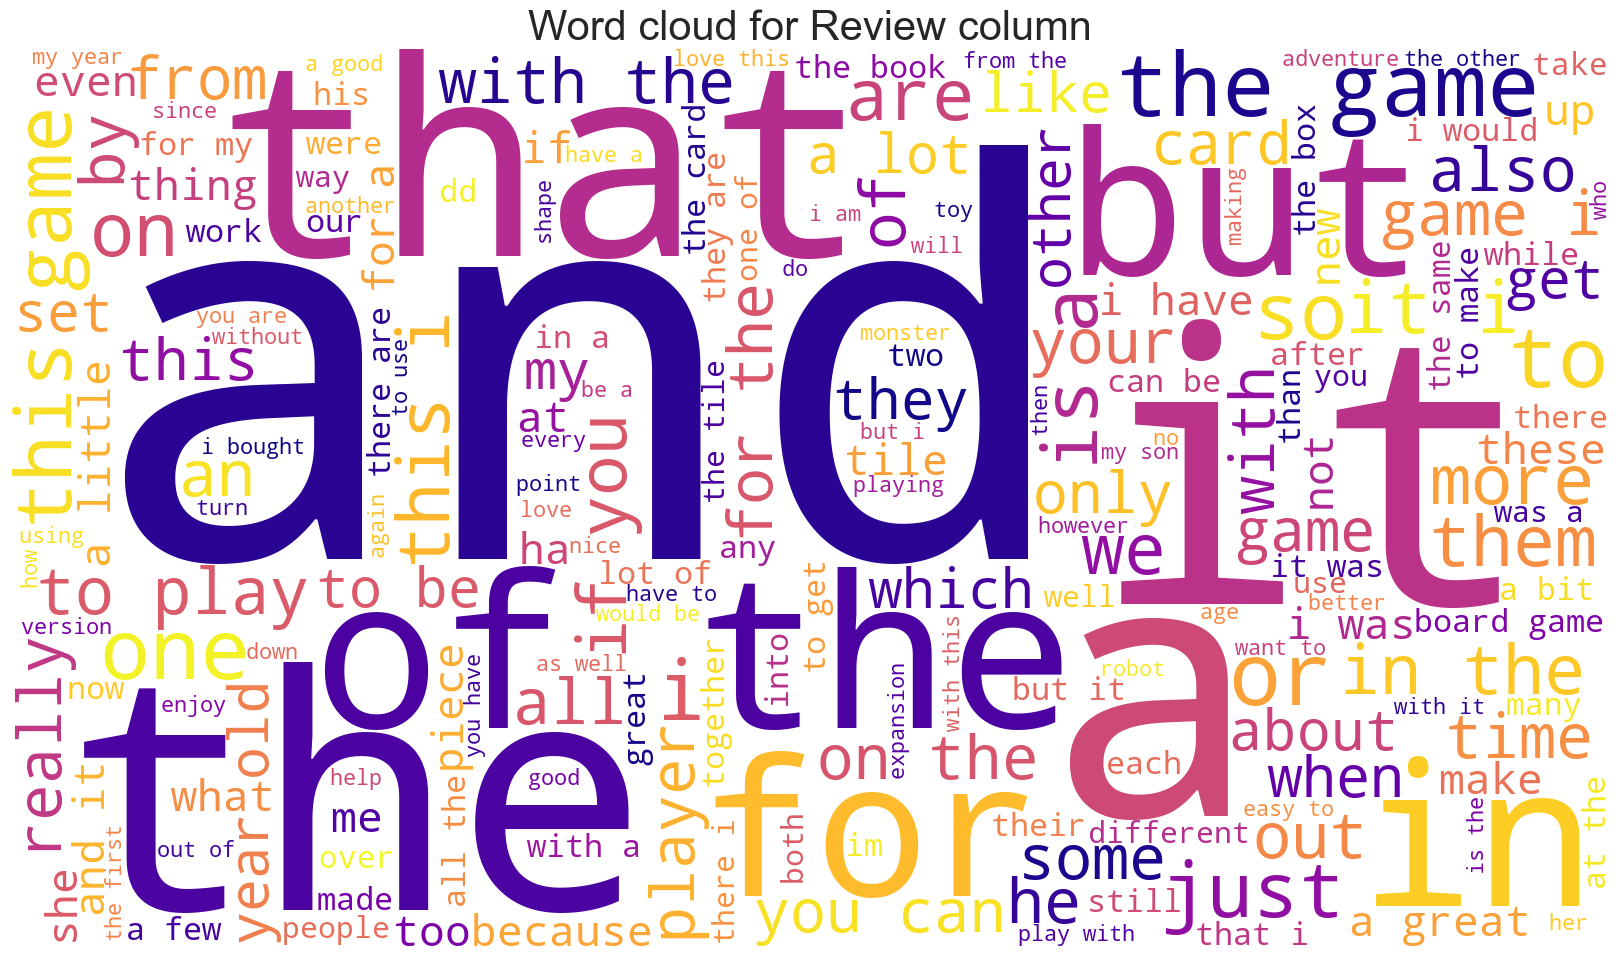

In [1020]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Word cloud for Review column', fontsize=30)
plt.show()

In [1021]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments2) 

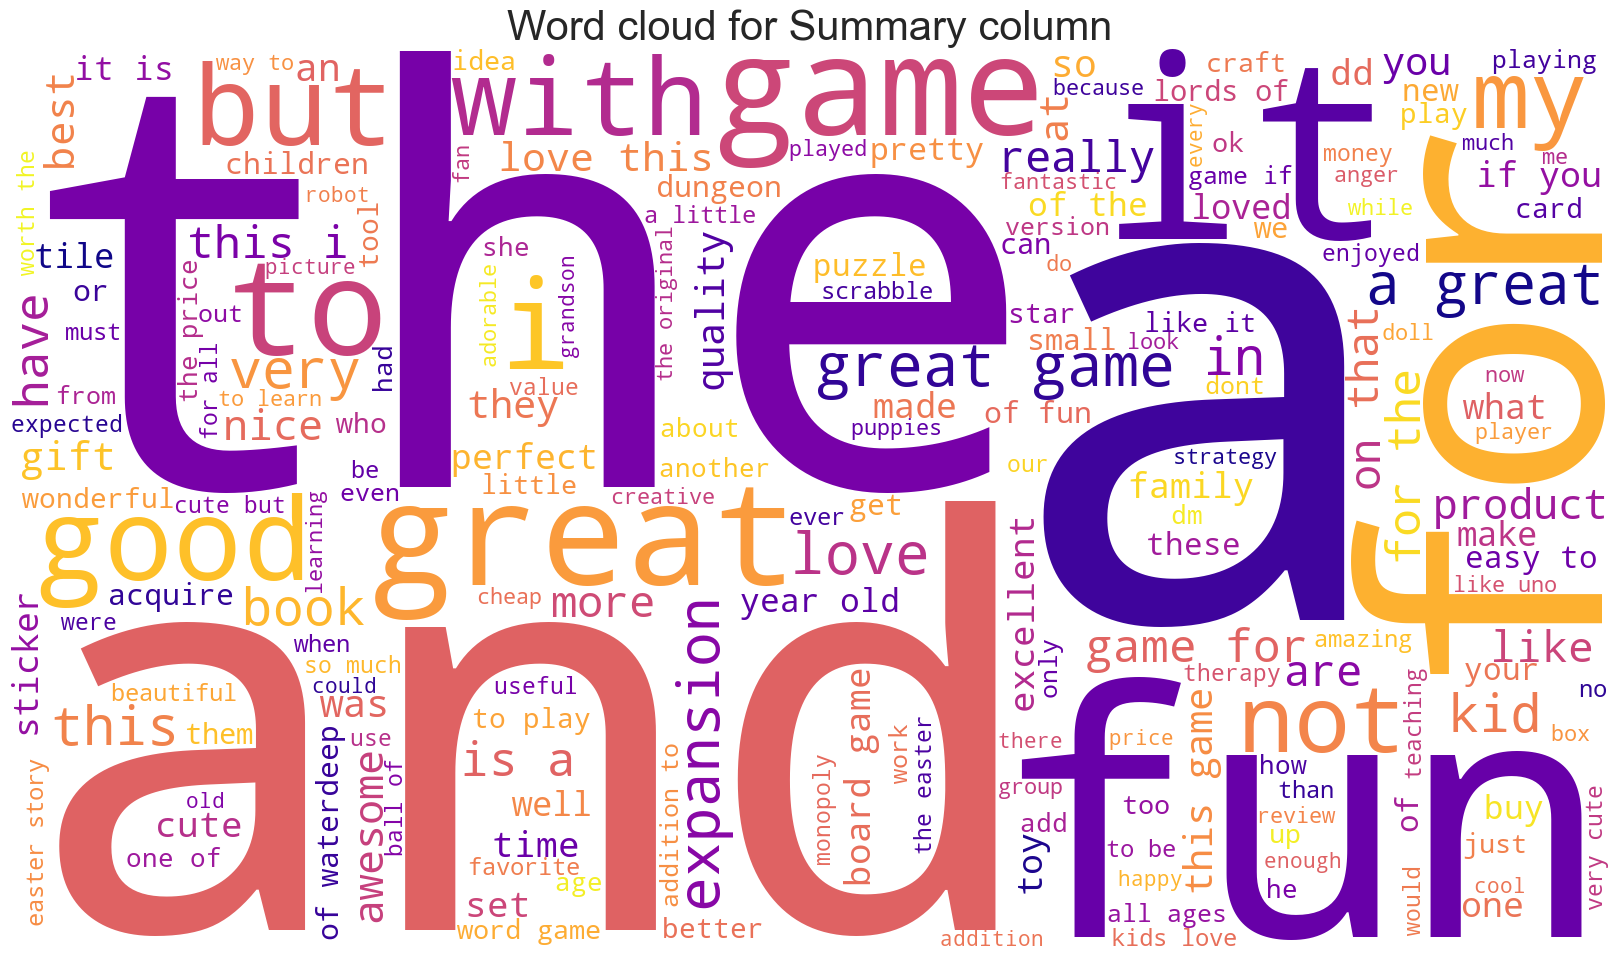

In [1022]:
# Plot the WordCloud image for the 'Summary' column                  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title('Word cloud for Summary column', fontsize=30)
plt.show()

In these word cloud, stop words prevail highly. These are the words that do not have the semantic importance (such as conjunctions, prepositions, articles, etc.) and they do not give us any indication of the sentiment of the reviews. Therefore, stop words must be removed.




### 3.4 Create frequency distribution

In [1023]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/azharmyrzasheva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1024]:
# Tokenise the words.
reviews_only['tokens1'] = reviews_only['review'].apply(word_tokenize)

# Preview data.
reviews_only['tokens1'].head()

0                                                                                                                                                                                                                      [when, it, comes, to, a, dms, screen, the, space, on, the, screen, itself, is, at, an, absolute, premium, the, fact, that, 50, of, this, space, is, wasted, on, art, and, not, terribly, informative, or, needed, art, as, well, makes, it, completely, useless, the, only, reason, that, i, gave, it, 2, stars, and, not, 1, was, that, technically, speaking, it, can, at, least, still, stand, up, to, block, your, notes, and, dice, rolls, other, than, that, it, drops, the, ball, completely]
1    [an, open, letter, to, galeforce9, your, unpainted, miniatures, are, very, not, bad, your, spell, cards, are, great, your, board, games, are, meh, your, dm, screens, however, are, freaking, terrible, im, still, waiting, for, a, single, screen, that, isnt, polluted, with, pointless, artwork, whe

In [1025]:
# Tokenise the words.
reviews_only['tokens2'] = reviews_only['summary'].apply(word_tokenize)

# Preview data.
reviews_only['tokens2'].head(10)


0    [the, fact, that, 50, of, this, space, is, wasted, on, art, and, not, terribly, informative, or, needed, art]
1                                                 [another, worthless, dungeon, masters, screen, from, galeforce9]
2                                                                             [pretty, but, also, pretty, useless]
3                                                                                                    [five, stars]
4                                                                                                    [money, trap]
5                                                                                         [best, gm, screen, ever]
6                                                                            [great, but, could, be, even, better]
7                                       [another, missed, opportunity, not, a, value, add, to, the, product, line]
8                                                                               

In [1026]:
# Define an empty list of tokens for the 'review' column:
all_tokens_review = []

for i in range(reviews_only.shape[0]):
    # Add each token to the list
    all_tokens_review = all_tokens_review + reviews_only['tokens1'][i]

In [1027]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_review)

# Preview data.
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [1028]:
# Define an empty list of tokens for the 'summary' column:
all_tokens_summary = []

for i in range(reviews_only.shape[0]):
    # Add each token to the list
    all_tokens_summary = all_tokens_summary + reviews_only['tokens2'][i]

In [1029]:
# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_summary)

# Preview data.
fdist

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 3.5. Remove alphanumeric characters and stopwords

In [1030]:
# Filter out tokens that are neither alphabets nor numbers (in 'review' column).
tokens_review = [word for word in all_tokens_review if word.isalnum()]


In [1031]:
# Filter out tokens that are neither alphabets nor numbers (in 'summary' column).
tokens_summary = [word for word in all_tokens_summary if word.isalnum()]


In [1032]:
# Remove the stop words from the 'review' column
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords1 = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_filtered1 = [x for x in tokens_review if x.lower() not in english_stopwords1]

# Define an empty string variable.
tokens_filtered1_string = ''

for value in tokens_filtered1:
    # Add each filtered token word to the string.
    tokens_filtered1_string = tokens_filtered1_string + value + ' '
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/azharmyrzasheva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I downloaded the 'stopwords' corpus from the nltk library. The 'english_stopwords1' list holds the English stopwords. The second list, tokens_filtered1 has a for loop and iterates through every word in the 'tokens_review' dataframe to ensure that the word is not in the 'english_stopwords1' list. If it isn't, then the word does have the semantic importance and can be retained for the purposes of further analysis.

In [1033]:
# Remove the stop words from the 'summary' column
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords2 = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_filtered2 = [x for x in tokens_summary if x.lower() not in english_stopwords2]

# Define an empty string variable.
tokens_filtered2_string = ''

for value in tokens_filtered2:
    # Add each filtered token word to the string.
    tokens_filtered2_string = tokens_filtered2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/azharmyrzasheva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The code above repeats the previous procedure for the 'tokens_summary' data frame.


### 3.6. Create word clouds without stop words

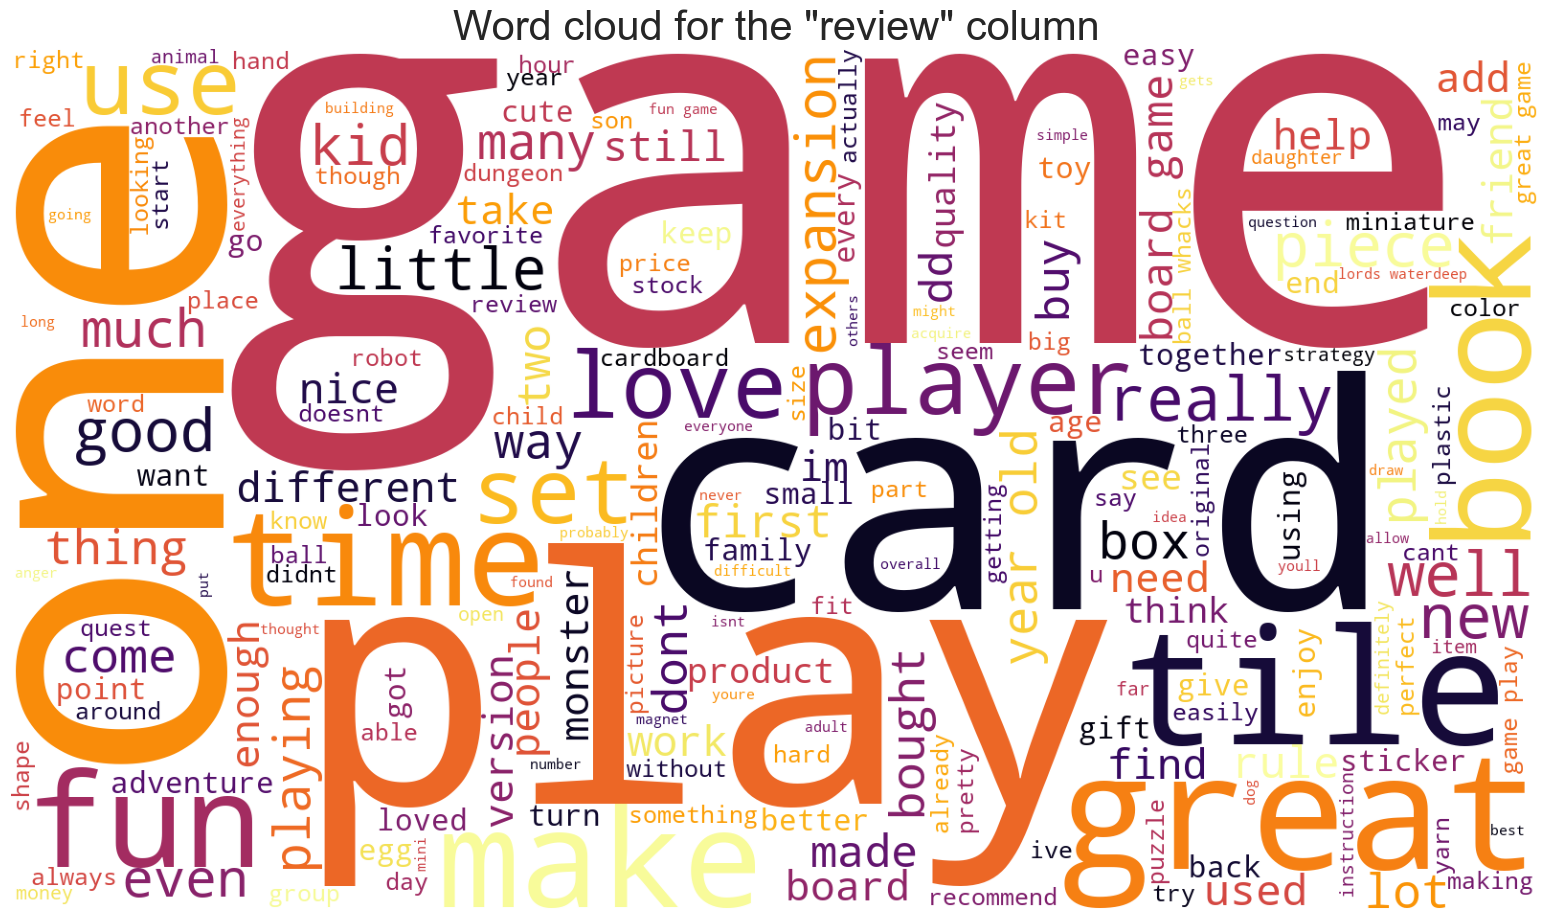

In [1034]:
# Create a WordCloud for 'review' column
wordcloud1 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='inferno', 
                min_font_size = 10).generate(tokens_filtered1_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis('off') 
plt.title('Word cloud for the "review" column', fontsize=30)
plt.tight_layout(pad = 0) 
plt.savefig('word_cloud_review.jpeg', format='jpeg', dpi=300)
plt.show()

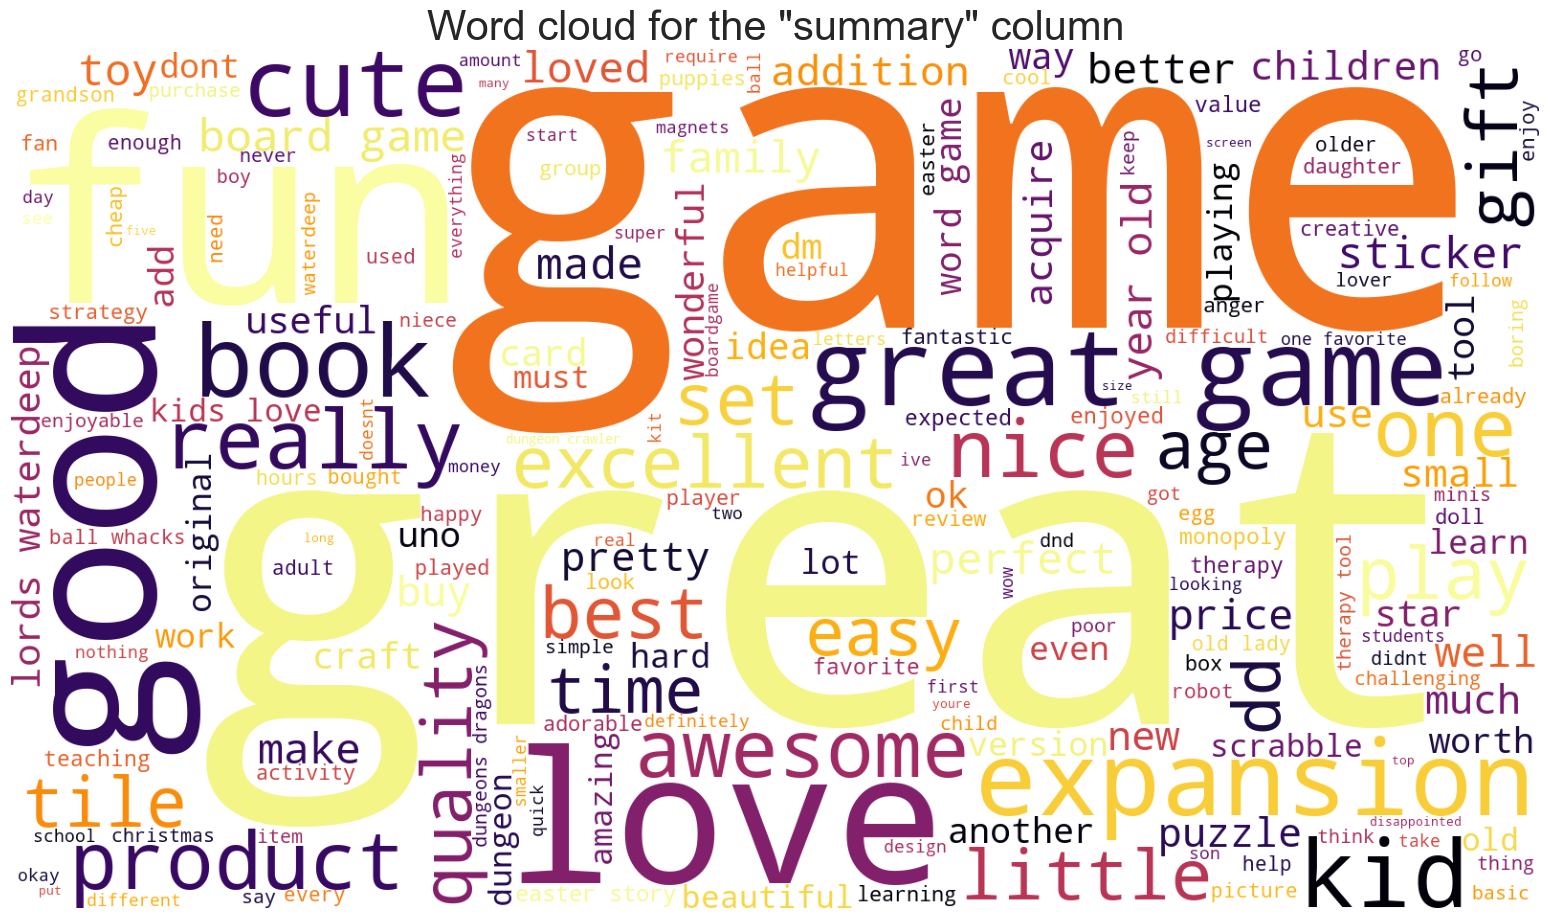

In [1035]:
# Create a WordCloud for 'summary' column
wordcloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='inferno', 
                min_font_size = 10).generate(tokens_filtered2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis('off') 
plt.title('Word cloud for the "summary" column', fontsize=30)
plt.tight_layout(pad = 0) 
plt.savefig('word_cloud_summary.jpeg', format='jpeg', dpi=300)
plt.show()

Having removed the stop words, it is now more visible what words actually stand out and were used the most frequently. Two separate word clouds were build for the two columns, but it is now visible that the words 'game', 'great', 'fun', 'nice', 'like' are repeated in both columns. 

### 3.7. Identify 15 most common words and polarity

In [1036]:
# View the frequency distribution ('review' column)
fdist1 = FreqDist(tokens_filtered1)

# Preview the data.
fdist1

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [1037]:
# View the frequency distribution ('summary' column)
fdist2 = FreqDist(tokens_filtered2)

# Preview the data.
fdist2

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [1038]:
# Import the Counter class ('review' column)
from collections import Counter

# Generate a DataFrame from Counter.
counts1 = pd.DataFrame(Counter(tokens_filtered1).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts1

Frequency
Word             
game         1359
one           475
play          442
fun           407
great         391
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

In [1039]:
# Import the Counter class ('summary' column)
from collections import Counter

# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(tokens_filtered2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts2

Frequency
Word                
game             268
great            236
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

Having identified the count of the most frequently used words in the reviews and summary, we can now build a bar graph showing the distribution for both columns. 

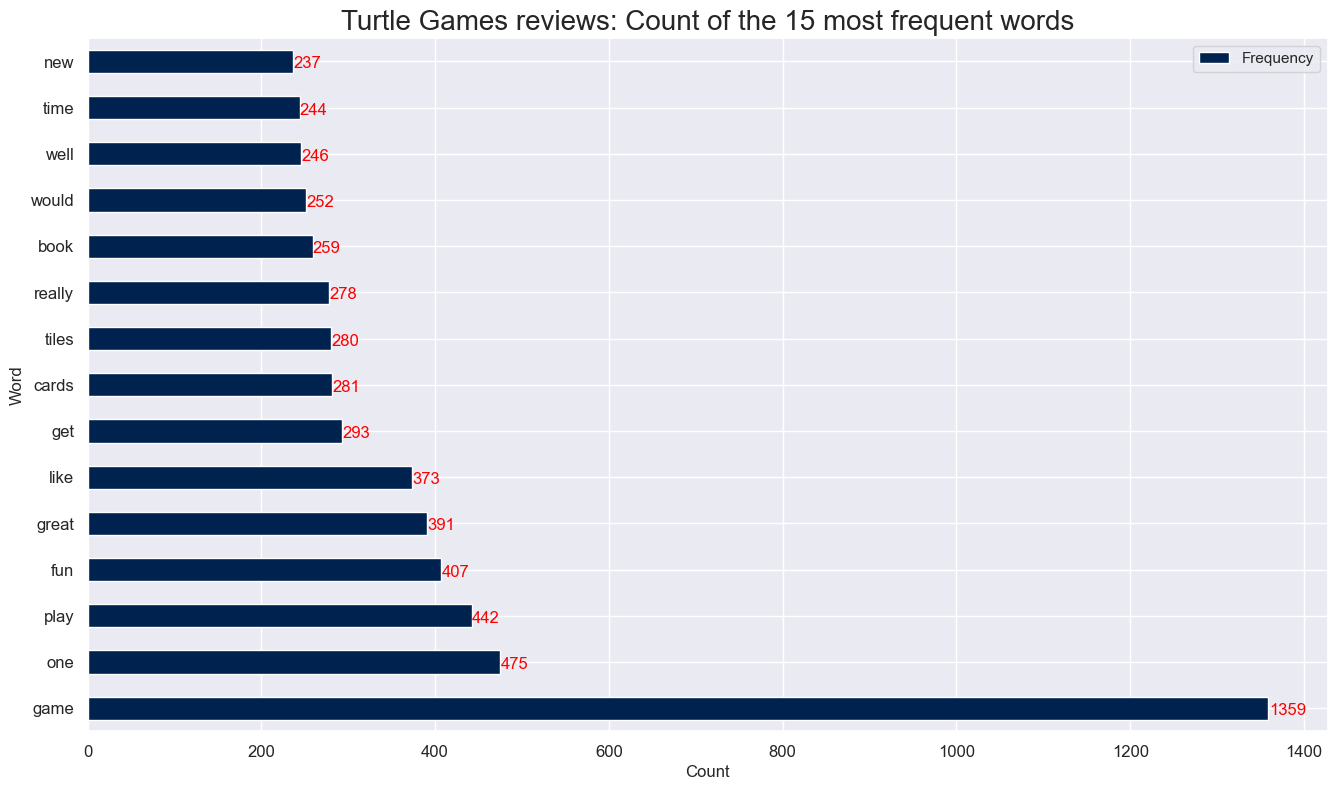

In [1040]:
# Set the plot type ('review' column)
ax = counts1.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='cividis')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

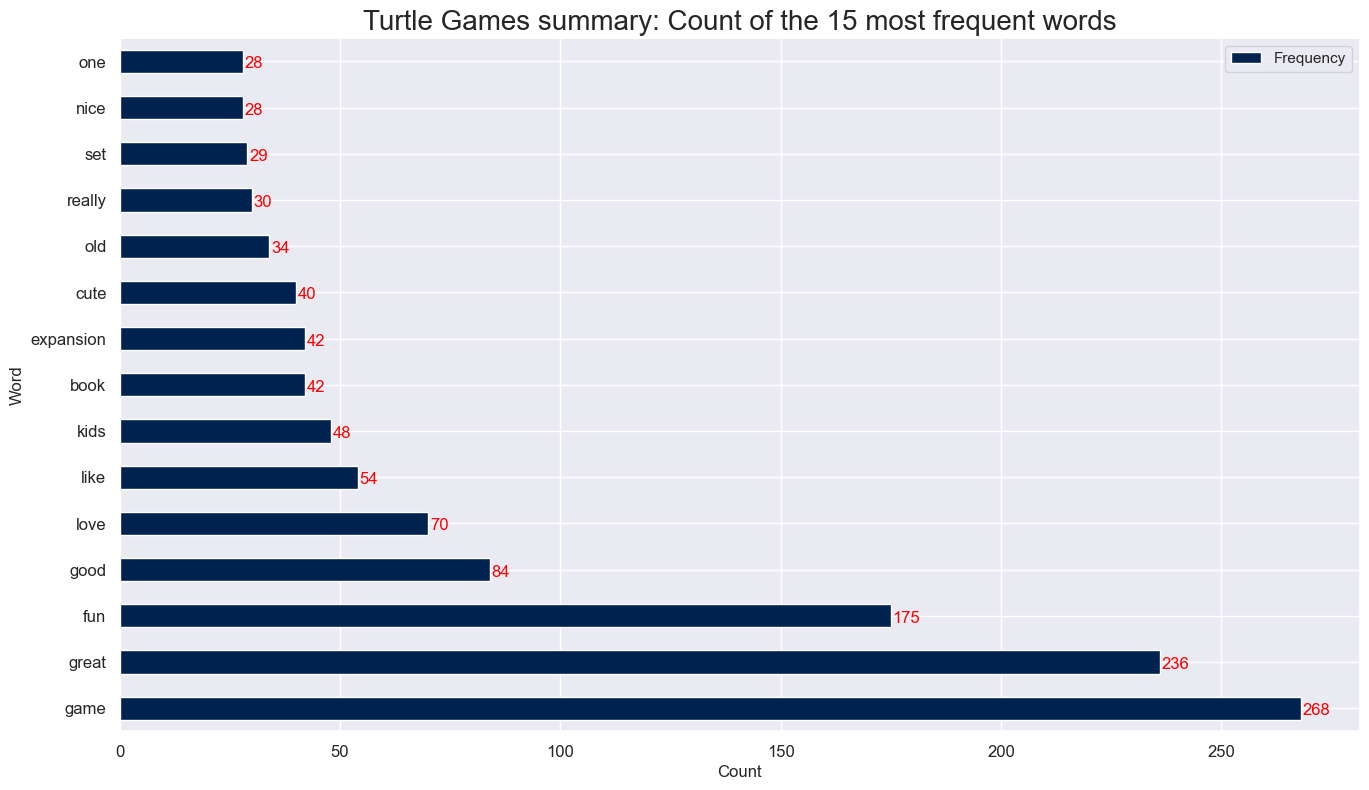

In [1041]:
# Set the plot type ('summary' column)
ax = counts2.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='cividis')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

Here, looking at the most frequently used words, the word 'game' stands out in both columns with 1359 and 268 times respectively (review and summary columns). 'Play', 'fun', 'great', 'like' also dominate in both columns suggesting that most of the customers enjoy the games selection from Turtle Games and are quite happy with the purchase. The word 'book' was also seen quite often (259 and 42 in both columns) suggesting that books are a quite popular product, but still bought not as often as games. The word 'expansion' was also in the top 15 frequently met words which might suggest that customers are happy to get the expansion of the games they played before. Lastly, the word 'kid' that often occured in the 'summary' column, may suggest that parents or grandparents would buy our products for their children, meaning that they are our consumers, but adults are the target audience for our marketing campaigns. 



### 3.8. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

Sentiment analysis, also known as opinion mining or social listening, is a technique used in natural language processing (NLP) to determine the emotional undertone of the survey data or reviews. Here we need to extract information from an unstructured and unorganised data and gain insights about customers' opinions of the products offered by Turtle Games. 

In [1042]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]



TextBlob is a great tool for processing textual data. It can help with common NLP tasks as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, tokenization, lemmatisation and more.

In [1043]:
# Determine polarity of both columns. 
reviews_only['polarity1'] = reviews_only['review'].apply(generate_polarity)
reviews_only['polarity2'] = reviews_only['summary'].apply(generate_polarity)

# View output.
print(reviews_only['polarity1'])
print(reviews_only['polarity2'])


0      -0.036111
1       0.035952
2       0.116640
3       0.578788
4      -0.316667
          ...   
1344    0.250000
1345    0.171429
1346    0.155208
1347    0.400000
1348    0.168750
Name: polarity1, Length: 1349, dtype: float64
0       0.150000
1      -0.800000
2       0.000000
3       0.000000
4       0.000000
          ...   
1344   -0.050000
1345   -0.400000
1346    0.088889
1347    0.200000
1348    0.200000
Name: polarity2, Length: 1349, dtype: float64


Here, with the help of TextBlob, I have extracted the polarity of the reviews and summary for all 1349 observations.

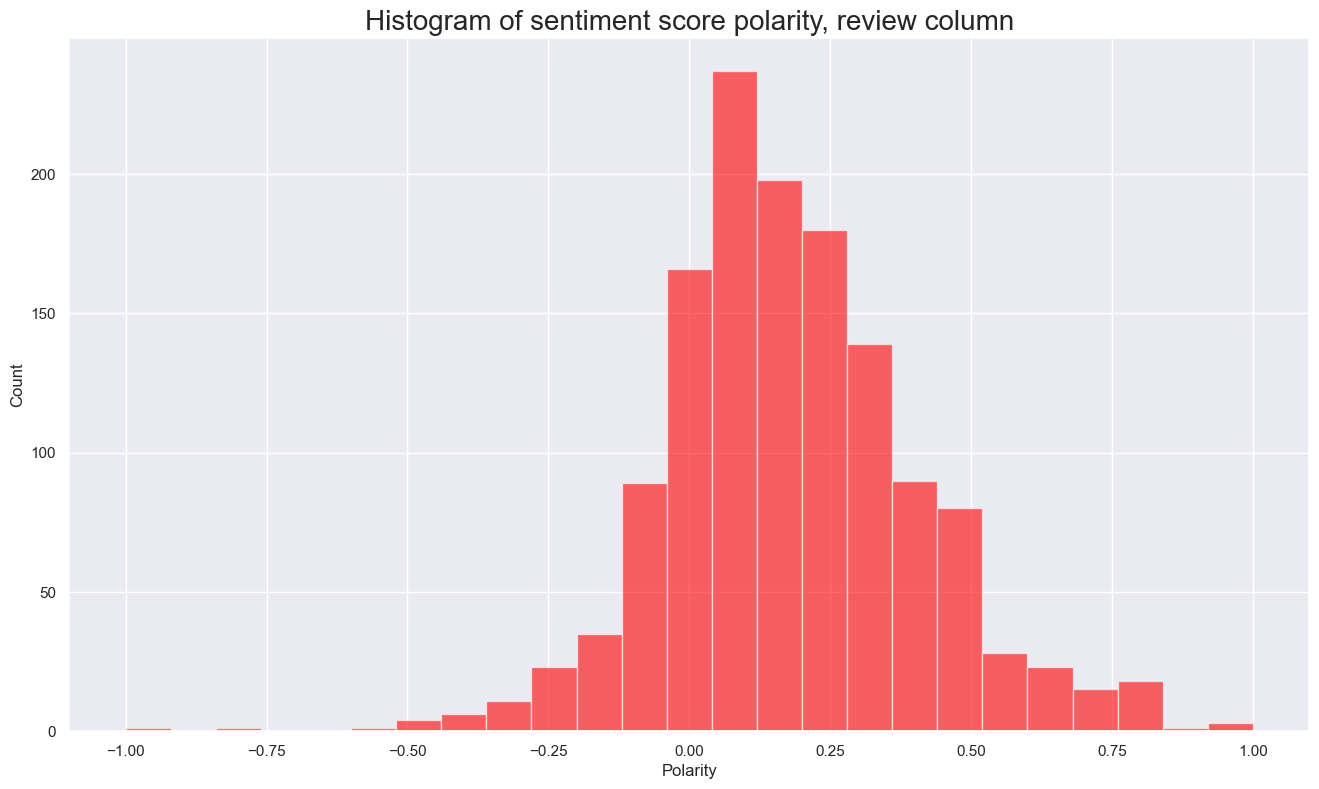

In [1044]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_only['polarity1'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity, review column', fontsize=20)
plt.savefig("histogram of sentiment.png", format='png', dpi=300)
    
plt.show()


This plot shows that most comments are above the 0 level which means that most of the commens have positive sentiment and less of a negative sentiment here in the 'review' column. The majority of the reviews have more of an informative content without much of a strong emotion expressed. 




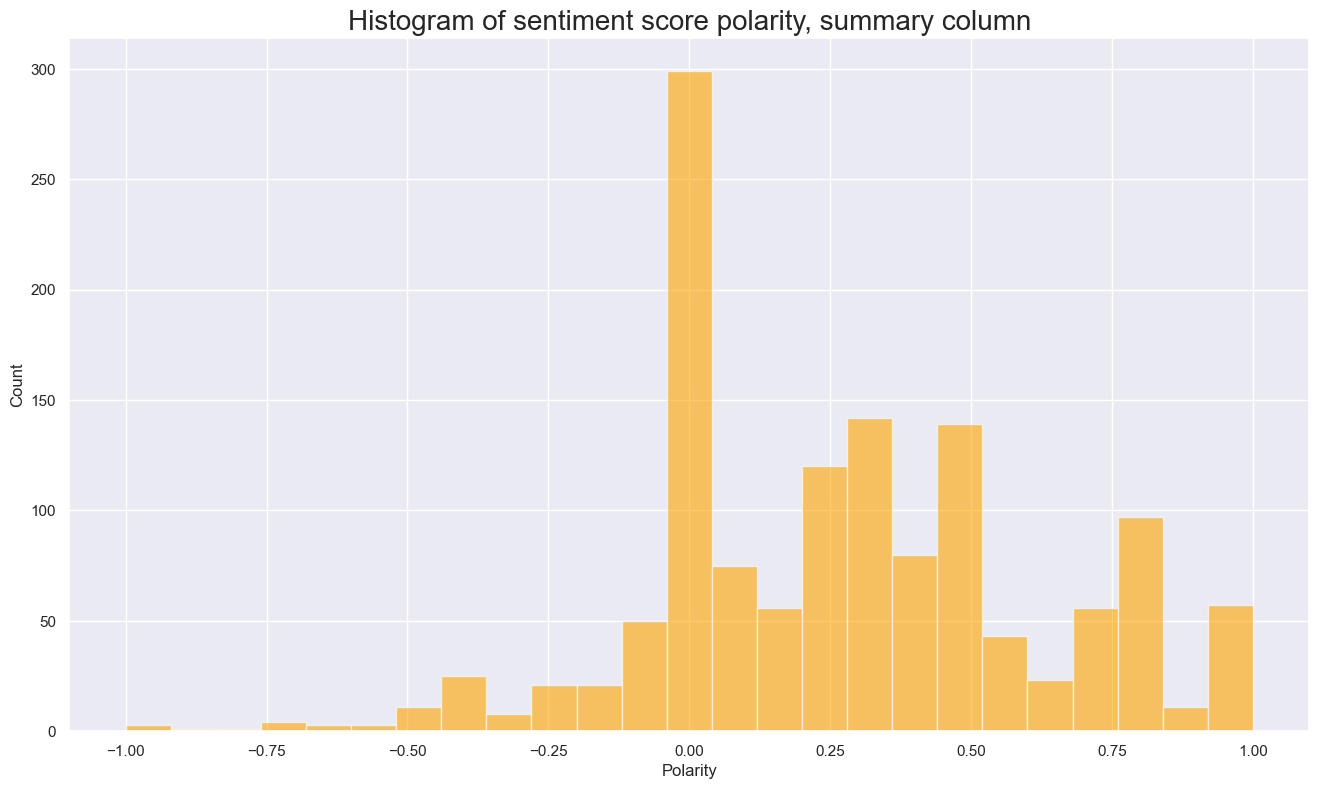

In [1045]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_only['polarity2'], num_bins, facecolor='orange', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity, summary column', fontsize=20)

plt.show()

The 'summary' column gives more of a neutral sentiment, and moves towards positive side as well. Negative comments are less or rare. Compared to the 'review' column, in the summary we can observe more comments reaching the +1, maximum sentiment score. 



### 3.9. Identify top 20 positive and negative reviews and summaries respectively

In [1046]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_reviews = reviews_only.nsmallest(20, 'polarity1')
negative_reviews.head()

# Eliminate unnecessary columns.
negative_reviews = negative_reviews[['review', 'polarity1']]

# Eliminate unnecessary columns
negative_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

pd.set_option('display.max_colwidth', 1200) # To widen the 'review' column

# View output.
negative_reviews


review  \
165                                                                                                                                                                booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not   
147                                                                                                                                                                                                                                                                                   incomplete kit very disappointing   
267                                                                                     one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
90                                                                                                                                                                                                            i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift   
141   i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed   
251                                                                                                      my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed   
382                                                                                                                                                             i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through   
312                                                                                                                                                    this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities   
355                                                                                                                                                                                                                      my son loves playing this game it was recommended by a counselor at school that works with him   
713                                                                                                                                if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon   
1011                                                                                                                                                                                you can play the expansions one at a time or add then both in for a longer game if your into lords of waterdeep this is a must have   
723                                                                                                                                                                                                 if you play dungeons and dragons then you will find this board game to be dumb and boring stick with the real thing   
600                                                                                                                                                  i was a bit disappointed in the quality of the cardboard piec

Because of the lengthy comments, the 'pd.set_option('display.max_colwidth', 1200)' function had to be used. Seems like most of the negative comments were related to either board games or card games. The common problems are unclear instructions, no indication regarding the difficulty of the game, quality of the materials (cardboard). 

The TextBlob library did a good job in identifying some of the negative comments guided by words like 'disappointed', 'boo', 'crappy', 'waste', 'confusing', 'frustrated', 'discouraged', etc. However, some of the comments are quite neutral, but they were wrongly labelled as having a negative connotation perhaps because of the word 'anger' that's present in those comments. For example, this comment 'one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it' was given a -0.55 polarity. Or 'very fun game to use with kids working on handling anger you play like uno but have to answer questions about anger' with polarity of -0.35. 

In [1047]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_reviews = reviews_only.nlargest(20, 'polarity1')

# Eliminate unnecessary columns.
positive_reviews = positive_reviews[['review', 'polarity1']]

# Adjust the column width.
positive_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

pd.set_option('display.max_colwidth', 1200) # To widen the 'summary' column

# View output.
positive_reviews

review  \
564                                                                                                                                                               perfect   
1080                                                                                                             my daughter loves her stickers awesome seller thank you    
1334                                                                                                                         perfect for tutoring my grandson in spelling   
890   the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy   
498                                                                                                                    great quality very cute and perfect for my toddler   
31                                                                                 the pictures are great  ive done one and gave it to a friend of mine who likes dragons   
336                                                                                                                         great seller happy with my purchase 5 starrrr   
439                                                                                                                                            great easter gift for kids   
491                                                                                                                                                       these are great   
692                                                                                                          bought this because i wanted it all these dd games are great   
824                                                                                                                                           husband seems happy with it   
826                                                                                                                           great accessory to use with the playing mat   
828                                                                                  great price arrived on time with no damage will be a great addition to my collection   
893                                                                this is a great accessory to the starter set i would recommend this to anyone who owns the starter set   
1075                                                                                                my granddaughter loves these so happy to find peppa pig items for her   
1113                                                                        great doll to go with the book  animals cant wait to read book with the doll to the grandkids   
1187                                                                                                                        a great creation tool it helps me concentrate   
1287                                                                                                                                   prompt service and a great product   
1333                                                                                                           this is a great tool to have at hand when playing quiddler   
325                                                                                this is a great product i use it as a therapeutic tool and it has been very effective    

      polarity1  
564    1.000000  
1080   1.000000  
1334   1.000000  
890    0.880000  
498    0.816667  
31     0.800000  
336    0.800000  
439    0.800000  
491    0.800000  
692    0.800000  
824    0.800000  
826    0.800000  
828    0.800000  
893    0.800000  
1075   0.800000  
1113   0.800000  
1187   0.800000  
1287   0.800000  
1333   0.800000  
325    0.790000

In [1048]:
positive_reviews.at[692, 'review']

'bought this because i wanted it all these dd games are great'

Retrieved some of the comments in order to cross check how accurate the sentiment analysis is. Overall, the positive sentiment is quite obvious: customers used the words like 'great', 'love', 'happy', 'perfect' to express their opinion. It's good to see that customers feel quite positively about the products.

In [1049]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_summaries = reviews_only.nsmallest(20, 'polarity2')

# Eliminate unnecessary columns.
negative_summaries = negative_summaries[['summary', 'polarity2']]

# Eliminate unnecessary columns
negative_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

pd.set_option('display.max_colwidth', 1200)

# View output.
negative_summaries

summary  \
17                                                  the worst value ive ever seen   
165                              boring unless you are a craft person which i am    
587                                                                        boring   
837   before this i hated running any rpg campaign dealing with towns because it    
1                        another worthless dungeon masters screen from galeforce9   
116                                                                  disappointed   
266                            promotes anger instead of teaching calming methods   
634                                      too bad this is not what i was expecting   
637                                                  bad qualityall made of paper   
144                               at age 31 i found these very difficult to make    
75                                                               small and boring   
368                                                                    mad dragon   
575                                                                 disappointing   
723                      then you will find this board game to be dumb and boring   
267                                                            anger control game   
59                                                      really small disappointed   
360                                                         its uno for the angry   
646                                     50th anniversary is a sad day for acquire   
808                                                     a disappointing coop game   
1116           its also really lame that the doll didnt come with the things she    

      polarity2  
17    -1.000000  
165   -1.000000  
587   -1.000000  
837   -0.900000  
1     -0.800000  
116   -0.750000  
266   -0.700000  
634   -0.700000  
637   -0.700000  
144   -0.650000  
75    -0.625000  
368   -0.625000  
575   -0.600000  
723   -0.591667  
267   -0.550000  
59    -0.500000  
360   -0.500000  
646   -0.500000  
808   -0.500000  
1116  -0.500000

In [1050]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_summaries = reviews_only.nlargest(20, 'polarity2')

# Eliminate unnecessary columns.
positive_summaries = positive_summaries[['summary', 'polarity2']]

# Eliminate unnecessary columns
positive_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

pd.set_option('display.max_colwidth', 1200)

# View output.
positive_summaries



summary  polarity2
5                                        best gm screen ever        1.0
23                                         wonderful designs        1.0
27                                                   perfect        1.0
61   theyre the perfect size to keep in the car or a diaper         1.0
107                                  perfect for preschooler        1.0
112                   awesome sticker activity for the price        1.0
132                                             awesome book        1.0
133                          he was very happy with his gift        1.0
150                                                  awesome        1.0
166                 awesome and welldesigned for 9 year olds        1.0
337                                                excellent        1.0
389                                   excellent therapy tool        1.0
407   the pigeon is the perfect addition to a school library        1.0
423                                best easter teaching tool        1.0
462                                                wonderful        1.0
466                    all f the mudpuppy toys are wonderful        1.0
471                                           awesome puzzle        1.0
476                                     not the best quality        1.0
514                                         excellent puzzle        1.0
521                             the best feedback i can have        1.0

**Summary:**
Overall, words 'game', 'book', 'great', 'kid', 'fun', 'cards' and others dominate in the customers' comments suggesting that the best sellers are still video games, with books and board games coming second and third respectively. 

The sentiment analysis was quite accurate with some imprecisions. The positive comments were quite strongly expressed with words like 'great', 'awesome', 'wonderful', 'love', 'excellent', etc. So they were given high polarity score by TextBlob. Some of the comments were wrongly labelled by the system. For example, 'not the best quality' was labelled as a positive polarity +1. 

The 'bag of words' assumption does not always work with comments that might seem ambiguous to the system. For example, the word 'anger' is automatically viewed as negative, although in this context it was a card game. I’m Therefore, some caution should be observed when interpreting the results of the customer reviews. 

Most of the board and card games received quite negative comments because of the unclear instructions, customers did not get what they expected, the quality of the material did not meet the standards. It's recommended to give clearer instructions to the customers regarding the games, indicate the age group it is relevant to, give some more information regarding the difficulty level, etc. Having a list of best selling products would be a plus as well.



